# Density Estimation

- 1. outliers detection
- 2. non parametric classification
- 3. non parametric regression
- 4. cluster analysis / mode hunting

Mode hunting을 설명하기 최선의 예제는 Histogram
   * 히스토그램은 partitionning of feature space, all bins/partitions are identical up to partition
<img src='https://miro.medium.com/max/660/0*MZw8IajE-F3mPFYG.png'>

## Simple 1D Kernel Density Estimation
- This example uses the KernelDensity class to demonstrate the principles of Kernel Density Estimation in one dimension.
- https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')

## 1. Plot the progression of histograms to kernels
- 산포도(scatter)

##  히스토그램(Histogram, 도수분포도)
- 개별 인스턴스를 보여주는 막대그래프와는 다르며 데이터의 range, 사분위수, 백분위수, 표준편차 등으로 표현
- 도수분포도는 각 구간(bin)별에 관측된 도수(관측빈도)를 막대그래프로 표현한 그래프
- 전체 자료의 범위를 구간(백분위수, 4분위수 등등)으로 구분하고, 각 구간에 포함되는 자료의 도수)개수를 산출한 표(lecture_06_data preprocessing)

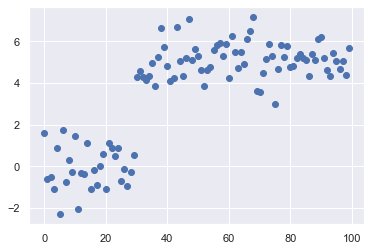

In [2]:
np.random.seed(1)
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
plt.scatter(np.arange(N), X)

#### bins의 개수를 변동하면서 그래프를 이해

<Figure size 1800x576 with 0 Axes>

<AxesSubplot:>

(array([ 0.,  2., 15., 12.,  2., 29., 37.,  3.,  0.]),
 array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
         3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ]),
 <BarContainer object of 9 artists>)

Text(0.5, 1.0, 'Histogram')

<AxesSubplot:>

(array([ 0.,  6., 16.,  8.,  5., 50., 15.,  0.,  0.]),
 array([-4.25      , -2.58333333, -0.91666667,  0.75      ,  2.41666667,
         4.08333333,  5.75      ,  7.41666667,  9.08333333, 10.75      ]),
 <BarContainer object of 9 artists>)

Text(0.5, 1.0, 'Histogram, bins shifted')

<AxesSubplot:>

(array([ 2.,  0.,  4.,  5.,  7.,  3.,  4.,  3.,  2.,  0.,  0.,  1.,  3.,
         9., 15., 16., 12.,  8.,  4.,  2.]),
 array([-2.3015387 , -1.82718299, -1.35282729, -0.87847158, -0.40411588,
         0.07023983,  0.54459553,  1.01895124,  1.49330694,  1.96766265,
         2.44201835,  2.91637406,  3.39072977,  3.86508547,  4.33944118,
         4.81379688,  5.28815259,  5.76250829,  6.236864  ,  6.7112197 ,
         7.18557541]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Histogram, much more bins')

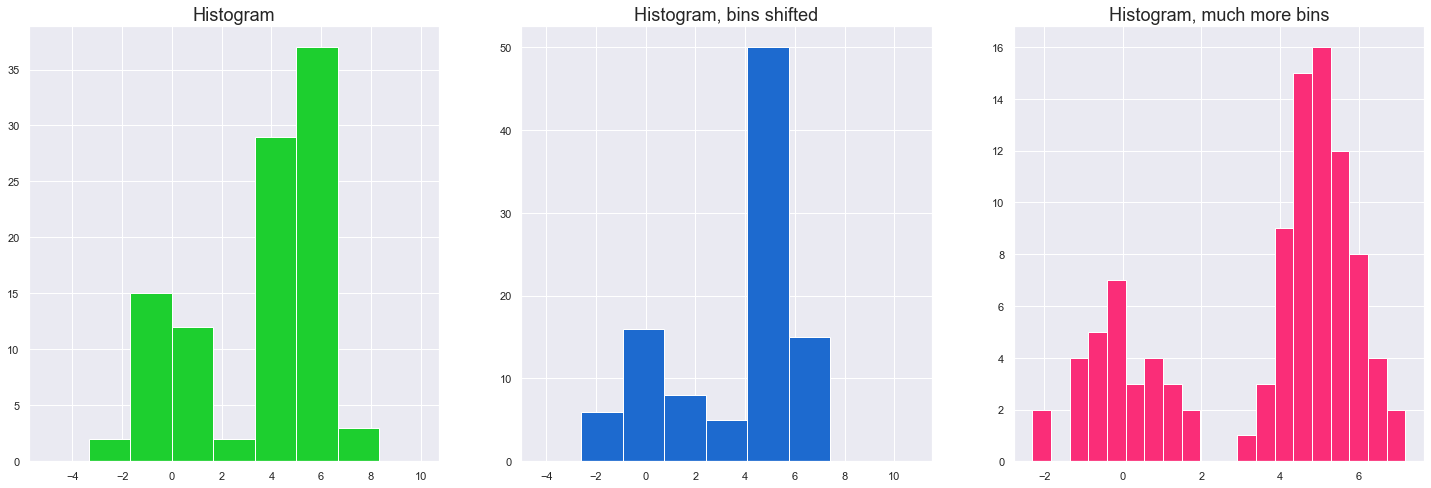

In [3]:
bins = np.linspace(-5, 10, 10)
plt.figure(figsize=(25,8)) 

plt.subplot(1, 3, 1) 
plt.hist(X, bins=bins, fc='#1dcf2f')
plt.title("Histogram", fontsize=18)

plt.subplot(1, 3, 2)
plt.hist(X, bins=bins + 0.75, fc='#1d6acf')
plt.title("Histogram, bins shifted", fontsize=18)

plt.subplot(1, 3, 3)
plt.hist(X, bins= 20, fc='#fa2d78')
plt.title("Histogram, much more bins", fontsize=18)

bins 구성에 따라 데이터 분포가 다르게 나타나게 되어 mis visulization 가능성이 있다. bin의 개수가 많아지면 질수록 noise가 있을 수 있으나 세밀한 분포를 알 수가 있다.

#### -5 부터 10까지 구간을 1,000개로 구분하여(bins=1,000)
- If we instead center each block on the point it represents, we get the estimate shown in the bottom left panel. 
- This is a kernel density estimation with a “top hat” kernel. 
- This idea can be generalized to other kernel shapes: a Gaussian kernel density estimate over the same distribution.
###  정규분포 커널 ('0'을 중심으로 반반)

In [4]:
#kde?

In machine learning, the radial basis function kernel, or RBF kernel, is a popular kernel function used in various kernelized learning algorithms. In particular, it is commonly used in support vector machine classification.
- RBF커널은 정규분포 pdf로 변환시켰다고 생가하면 됨. 관측된 인스턴스의 평균과 편차를 고려하여 평균부터의 거리를 계산(similarity)

<img src ='https://wikimedia.org/api/rest_v1/media/math/render/svg/c16fd6c515412f96a57506103896178d0e8af77d'>

In [5]:
X.shape

(100, 1)

<AxesSubplot:ylabel='Density'>

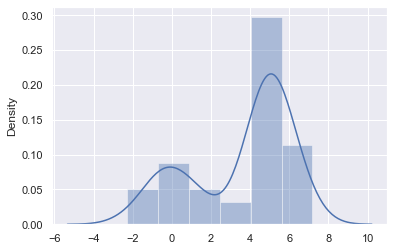

In [6]:
sns.distplot(X)

<Figure size 1800x864 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

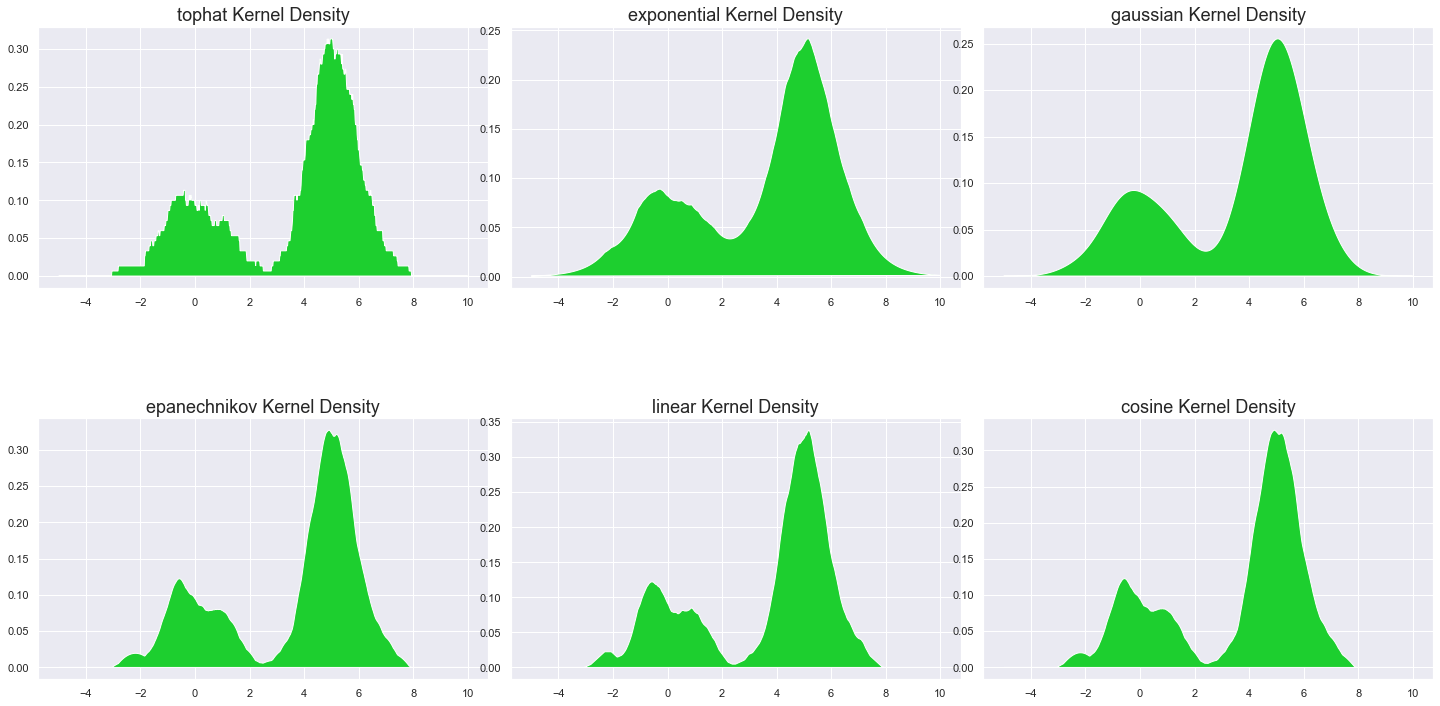

In [7]:
from sklearn.neighbors import KernelDensity
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]    # np.linspace(-5, 10, 1000).reshape(-1,1)
plt.figure(figsize=(25, 12)) 

for i, kernel in enumerate(['tophat', 'exponential', 'gaussian',
                           'epanechnikov', 'linear', 'cosine']):
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust(hspace = .5, wspace=.05)
    kde = KernelDensity(kernel=kernel, bandwidth=0.75).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax= plt.fill(X_plot[:, 0], np.exp(log_dens), fc='#1dcf2f')
    ax= plt.title(str(kernel) + ' Kernel Density', fontsize='18')

Intuitively, one can also think of a histogram as a stack of blocks, one block per point. By stacking the blocks in the appropriate grid space, we recover the histogram. But what if, instead of stacking the blocks on a regular grid, we center each block on the point it represents, and sum the total height at each location? This idea leads to the lower-left visualization. It is perhaps not as clean as a histogram, but the fact that the data drive the block locations mean that it is a much better representation of the underlying data.

- This visualization is an example of a kernel density estimation.
- In this case with a top-hat kernel (i.e. a square block at each point). We can recover a smoother distribution by using a smoother kernel. 
- A Gaussian kernel density estimate, in which each point contributes a Gaussian curve to the total. 
       * The result is a smooth density estimate which is derived from the data, and functions as a powerful non-parametric model of the distribution of points.

## Pairwise metrics, Affinities and Kernels (for further study)
https://scikit-learn.org/stable/modules/metrics.html#metrics

### Scikit-learn implements efficient kernel density estimation 
- kde using either a Ball Tree or KD Tree structure, through the KernelDensity estimator. 
- The available kernels are shown as belows

In [8]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

## kernel density estimates for a distribution of 100 samples in 1 dimension. 
- Though this example uses 1D distributions, kernel density estimation is easily and efficiently extensible to higher dimensions as well.
- Kernel density estimation in scikit-learn is implemented in the KernelDensity estimator, which uses the Ball Tree or KD Tree for efficient queries (see Nearest Neighbors for a discussion of these). 
- Though the below example uses a 1D data set for simplicity, kernel density estimation can be performed in any number of dimensions, though in practice the curse of dimensionality causes its performance to degrade in high dimensions.

In the following figure, 100 points are drawn from a bimodal distribution, and the kernel density estimates are shown for three choices of kernels:
### Plot a 1D density example

Text(6, 0.38, 'N=100 points')

(-4.0, 9.0)

(-0.02, 0.4)

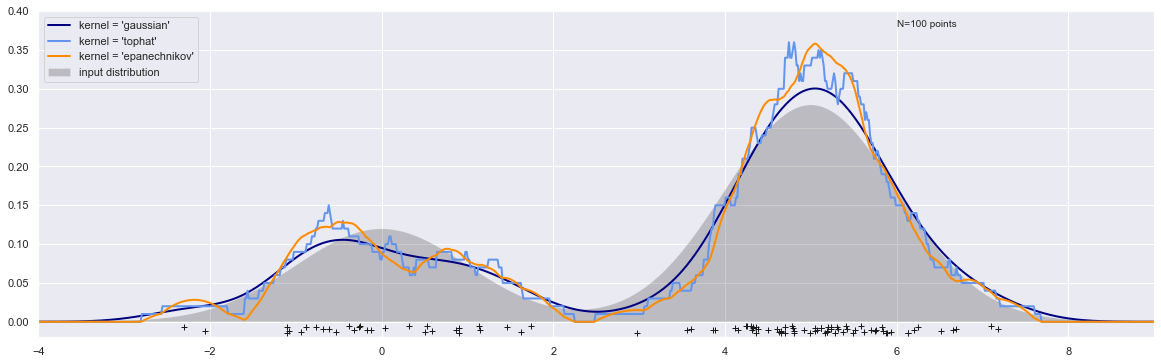

In [9]:
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots(figsize=(20, 6))
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

- It’s clear how the kernel shape affects the smoothness of the resulting distribution. The scikit-learn kernel density estimator can be used as follows:
- https://scikit-learn.org/stable/modules/density.html#kernel-density

## Kernel로 iris 데이터를 unsupervised learning으로 몇 개의 그룹인지 확인

In [10]:
from sklearn.datasets import load_iris
X = load_iris().data

<Figure size 1080x216 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Tophat Kernel Density')

<AxesSubplot:>

Text(0.5, 1.0, 'Gaussian Kernel Density')

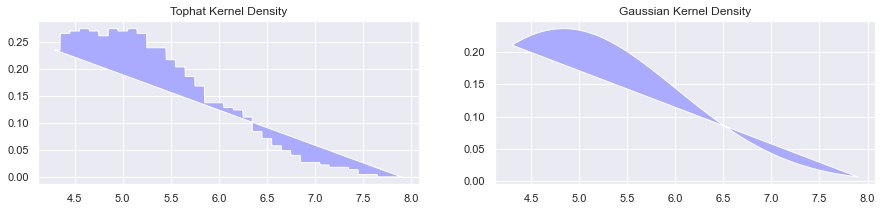

<Figure size 1080x216 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Tophat Kernel Density')

<AxesSubplot:>

Text(0.5, 1.0, 'Gaussian Kernel Density')

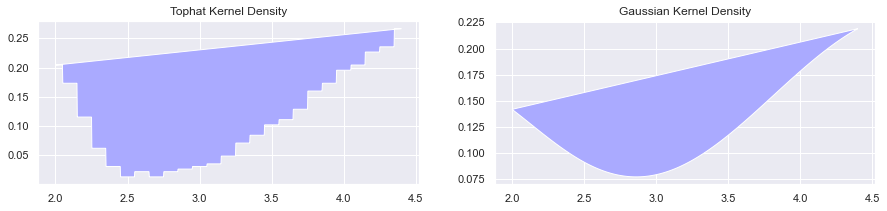

<Figure size 1080x216 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Tophat Kernel Density')

<AxesSubplot:>

Text(0.5, 1.0, 'Gaussian Kernel Density')

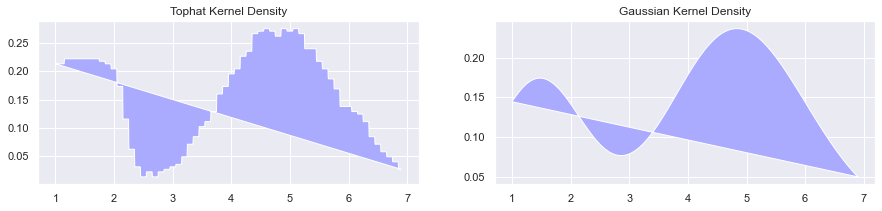

<Figure size 1080x216 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Tophat Kernel Density')

<AxesSubplot:>

Text(0.5, 1.0, 'Gaussian Kernel Density')

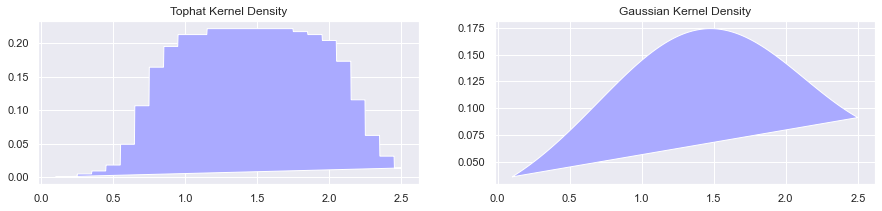

In [11]:
from sklearn.neighbors import KernelDensity

for i in np.arange(4) :

    plt.figure(figsize=(15,3)) # create a plot figure
    X_plot = np.linspace(X[:, i].min(), X[:, i].max(), 1000)[:, np.newaxis]  
    
    # create the first of two panels and set current axis

    # tophat KDE
    plt.subplot(1, 2, 1) # (rows, columns, panel number)
    kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X[:, 2].reshape(-1,1))
    log_dens = kde.score_samples(X_plot)
    plt.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
    plt.title("Tophat Kernel Density")

    # Gaussian KDE
    plt.subplot(1, 2, 2)
    kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X[:, 2].reshape(-1,1))

    log_dens = kde.score_samples(X_plot)
    plt.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
    plt.title("Gaussian Kernel Density")
    
    plt.show()

sepal length (cm) & sepal width (cm)


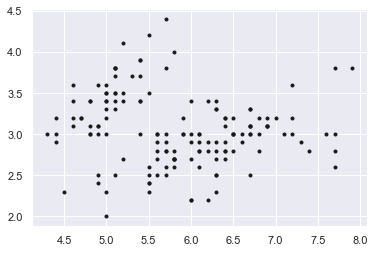

sepal length (cm) & petal length (cm)


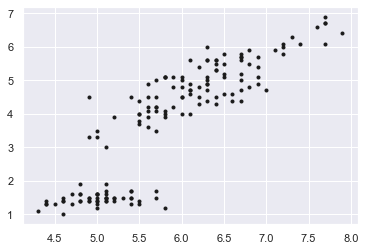

sepal length (cm) & petal width (cm)


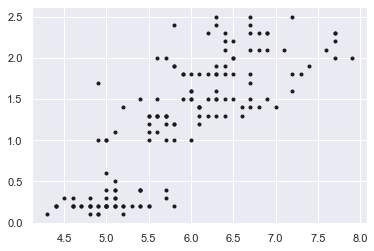

sepal width (cm) & petal length (cm)


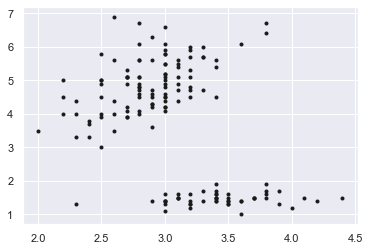

sepal width (cm) & petal width (cm)


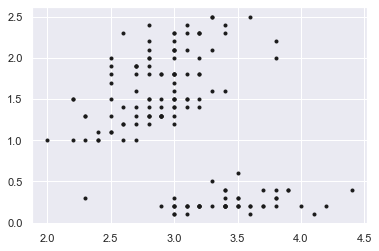

petal length (cm) & petal width (cm)


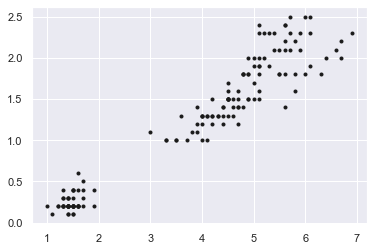

In [12]:
import itertools
for i, j in itertools.combinations([0,1,2,3], 2):
    features = load_iris()['feature_names']
    print(f'{features[i]} & {features[j]}')
    plt.scatter(X[:, i], X[:, j], c="k", marker=".")
    plt.show()

# END

## Illustration of prior and posterior Gaussian process for different kernels

This example illustrates the prior and posterior of a GPR with different kernels. Mean, standard deviation, and 10 samples are shown for both prior and posterior.

- https://towardsdatascience.com/real-time-time-series-anomaly-detection-981cf1e1ca13
- https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html

## 임의의 확률분포를 생성 (Hideen process(평군과 분산의 종류)무작위로)
- print(f'배열의 {random_slice} 번째 slice해서 이후는 {intt}를 누적하여 더한다')

### 모집단 생성

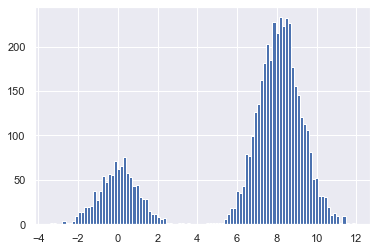

In [13]:
np.random.seed(1024)
def generate_random_data(num_points: int, n_randomization: int=3):
    x = np.random.randn(num_points)
    for _ in range(n_randomization):
        random_slice = int(np.random.rand() * num_points)
        x[random_slice:] += np.random.randint(0, 10)
    return x

population = generate_random_data(5000)
ax = plt.hist(population, bins=100)

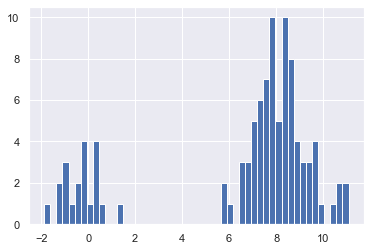

In [14]:
sample = np.random.choice(population, 100)
ax = plt.hist(sample, bins=50)

Text(0.5, 1.0, 'Gaussian Kernel Density')

Text(0, 0.5, 'Similarity')

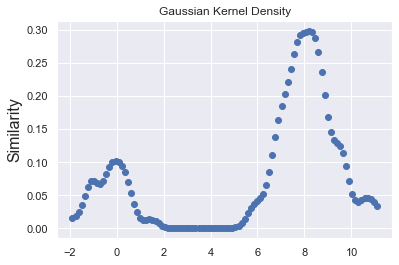

In [15]:
from sklearn.neighbors import KernelDensity
X_plot = np.linspace(sample.min(), sample.max(), 100)[:, np.newaxis] 
kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(sample.reshape(-1,1))

log_dens = kde.score_samples(X_plot)
plt.scatter(X_plot[:, 0], np.exp(log_dens))
plt.title("Gaussian Kernel Density")
plt.ylabel('Similarity', fontsize=16)

Text(0.5, 1.0, 'np.log Gaussian Kernel Density')

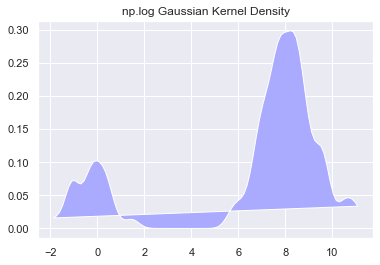

In [16]:
plt.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
plt.title("np.log Gaussian Kernel Density")

## Bootstrapping

## Bootstrapping

### 표본수 50개에서 반복하여 복원 추출 200회 재표본

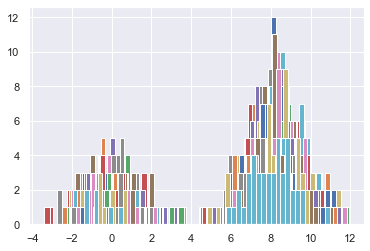

In [17]:
bootstrap=[]
for trial in range(200): # 50회 재표본
    sample = np.random.choice(population, 50, replace=True)
    ax = plt.hist(sample, bins=50)
    bootstrap.append(sample)

### 중심극한 정리

(6.443227963126546, 3.4888637512748857)

(6.985333382993656, 2.9876661920798733)

(6.448983389748579, 3.488060150514431)

<AxesSubplot:>

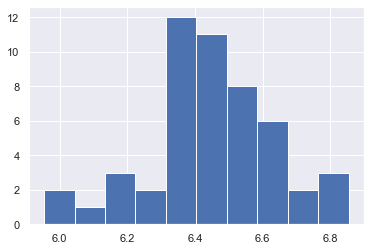

In [18]:
(np.mean(population), np.std(population))
(np.mean(sample), np.std(sample))
(np.mean(bootstrap), np.std(bootstrap))
pd.DataFrame(bootstrap).mean().hist()

### smaple data 만들기

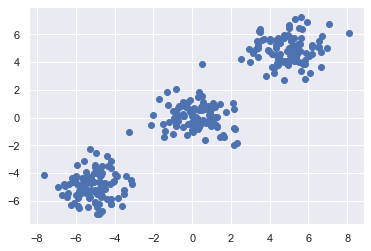

In [19]:
from sklearn.datasets import make_blobs
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(n_samples=300, centers=centers, 
                  shuffle=False, random_state=42)
plt.scatter(X[:,0], X[:,1])

# End